In [1]:
# Import libraries
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import sarracen as src
import numpy as np

/users/labnet/st2/jjnarvaezcor/virtual-env/lib/python3.8/site-packages/sarracen/kernels/cubic_spline.py:15: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @jit(fastmath=True)
/users/labnet/st2/jjnarvaezcor/virtual-env/lib/python3.8/site-packages/sarracen/kernels/quartic_spline.py:15: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @jit(fastmath=True)
/users/labnet/

# 3D Init Setup

In [2]:
n = 16*16*16
dm = 1./n
eta = 1.2 

In [3]:
sdf_ini = src.read_csv('../Data/initial_distribution/sedov_blast_wave.csv')
sdf_ini.params={'mass':dm, 'hfact':eta}
sdf_ini.calc_density()

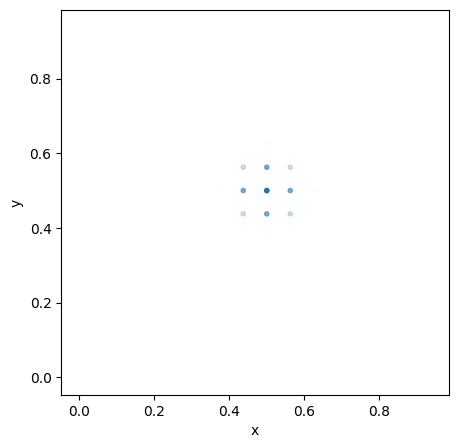

In [4]:
fig, ax = plt.subplots(figsize=(5,5))

alph = "u"
x1="x"
x2="y"

ax.scatter(sdf_ini[x1], sdf_ini[x2], marker=".", alpha=sdf_ini[alph]/np.max(sdf_ini[alph]))

ax.set_xlabel(x1)
ax.set_ylabel(x2)

plt.show()

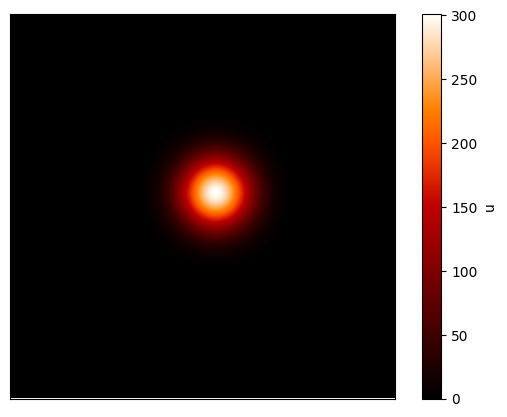

In [5]:
fig, ax = plt.subplots(figsize=(7,5))
ax = sdf_ini.render('u', xsec=0.5, ax=ax, rotation=[0,0,0])

# Initial Setup

In [6]:
sdf = src.read_csv('../Data/results/sedov_blast_wave/final.csv')
sdf.params={'mass':dm, 'hfact':eta}
sdf.calc_density()
sdf

,x,y,z,vx,vy,vz,h,u,rho
0,1.000000,1.000000,1.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.074979,1.400000e-15,1.000825
1,0.062500,1.000000,1.000000,-5.726752e-10,-0.000000e+00,0.000000e+00,0.074979,3.021000e-13,1.000825
2,0.125000,1.000000,1.000000,-1.368369e-08,-0.000000e+00,-0.000000e+00,0.074979,3.704610e-11,1.000827
3,0.187500,1.000000,1.000000,-1.542644e-07,0.000000e+00,0.000000e+00,0.074979,1.570512e-09,1.000833
4,0.250000,1.000000,1.000000,-9.306792e-07,-0.000000e+00,-0.000000e+00,0.074979,2.835445e-08,1.000860
...,...,...,...,...,...,...,...,...,...
4091,0.687502,0.937505,0.937505,2.588717e-04,5.314104e-04,5.314104e-04,0.074925,1.331142e-04,1.003012
4092,0.750001,0.937501,0.937501,9.481762e-05,1.516564e-04,1.516564e-04,0.074959,2.486356e-05,1.001643
4093,0.812500,0.937500,0.937500,2.165655e-05,2.858812e-05,2.858812e-05,0.074974,2.568434e-06,1.001052
4094,0.875000,0.937500,0.937500,2.877516e-06,3.257802e-06,3.257802e-06,0.074978,1.260827e-07,1.000869


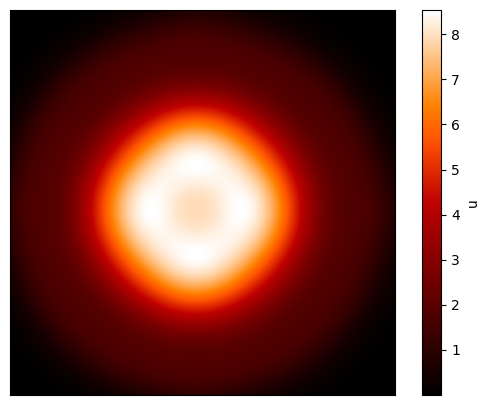

In [7]:
fig, ax = plt.subplots(figsize=(7,5))
ax = sdf.render('u', xsec=0.5, ax=ax, rotation=[0,0,0])

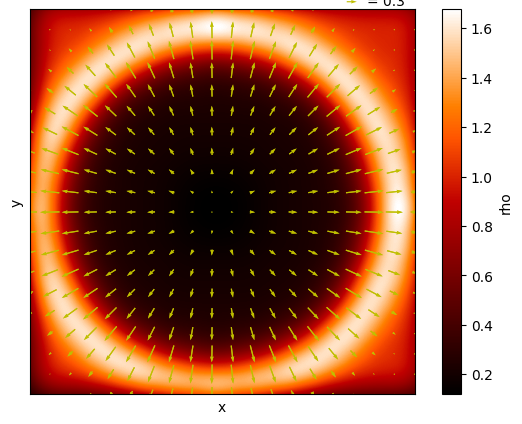

In [8]:
fig, ax = plt.subplots(figsize=(7,5))
ax = sdf.render('rho', xsec=0.5, ax=ax, rotation=[0,0,0])
ax = sdf.arrowplot(['vx', 'vy', 'vz'], color='y')

# Final Setup

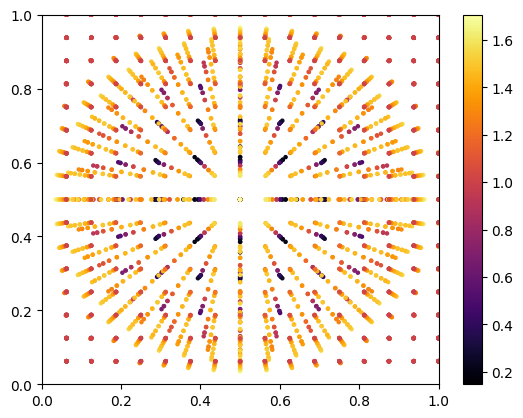

In [9]:
plt.scatter(sdf['x'], sdf['y'], c=sdf['rho'], cmap='inferno', s=5)
# Add a colorbar
plt.colorbar()
plt.xlim(0,1)
plt.ylim(0,1)
plt.show()

# Conservation's Laws

In [10]:
# Angular Momentum
def angular_momentum(x, y, z, vx, vy, vz):
    lx = y*vz - z*vy
    ly = z*vx - x*vz
    lz = x*vy - y*vx
    return lx, ly, lz

In [22]:
T = 41
time = range(0, T)
ang_mom = np.zeros(T)
lin_mom = np.zeros(T)
energ = np.zeros(T)

for ii in range(1, T+1):
    df = src.read_csv('../Data/results/sedov_blast_wave/' + str(ii) + ".csv")
    L = np.sum(angular_momentum(df['x'], df['y'], df['z'], df['vx'], df['vy'], df['vz']), axis=1)
    ang_mom[ii-1] = np.sqrt(L[0]*L[0] + L[1]*L[1] + L[2]*L[2])
    vx = np.sum(df['vx'])
    vy = np.sum(df['vy'])
    vz = np.sum(df['vz'])
    lin_mom[ii-1] = np.sqrt(vx*vx + vy*vy + vz*vz)
    energ[ii-1] = 0.5*lin_mom[ii-1] + np.sum(df['u'])

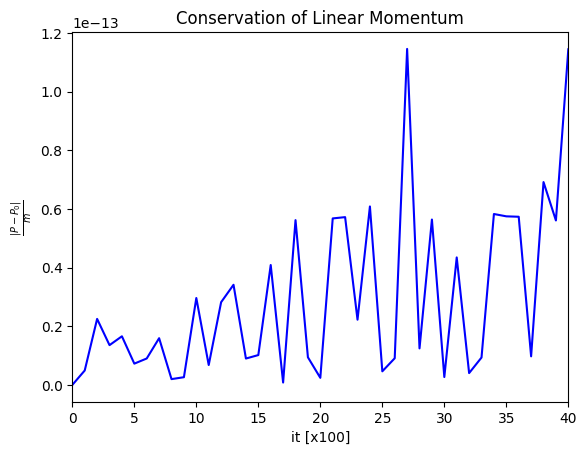

In [23]:
plt.plot(time[:], np.abs(lin_mom[:]-lin_mom[0]), '-', color='blue')
plt.title("Conservation of Linear Momentum")
plt.xlabel("it [x100]")
plt.ylabel(r"$\frac{|P-P_0|}{m}$")
plt.xlim(0, T-1)
plt.show()

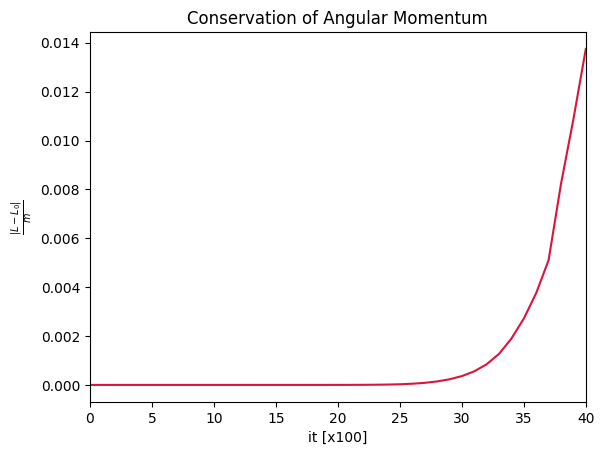

In [24]:
plt.plot(time[:], np.abs(ang_mom[:]-ang_mom[0]), '-', color='crimson')
plt.title("Conservation of Angular Momentum")
plt.xlabel("it [x100]")
plt.ylabel(r"$\frac{|L-L_0|}{m}$")
plt.xlim(0, T-1)
plt.show()

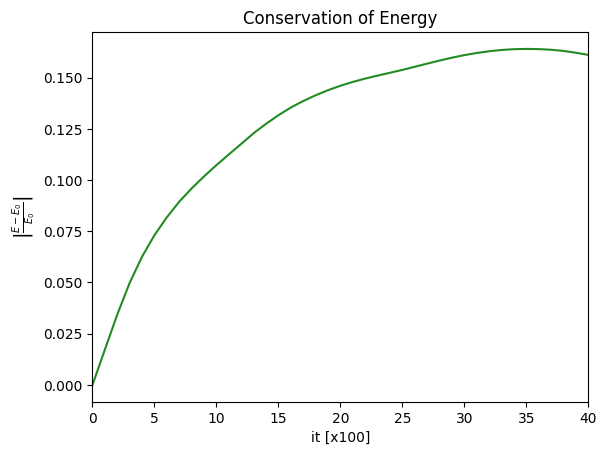

In [25]:
plt.plot(time[:], np.abs((energ[:]-energ[0])/energ[0]), '-', color='forestgreen')
plt.title("Conservation of Energy")
plt.xlabel("it [x100]")
plt.ylabel(r"$\left|\frac{E-E_0}{E_0}\right|$")
plt.xlim(0, T-1)
plt.show()

# Density distribution

In [15]:
rad = np.sqrt((sdf["x"]-0.5)**2 + (sdf["y"]-0.5)**2+(sdf["z"]-0.5)**2)

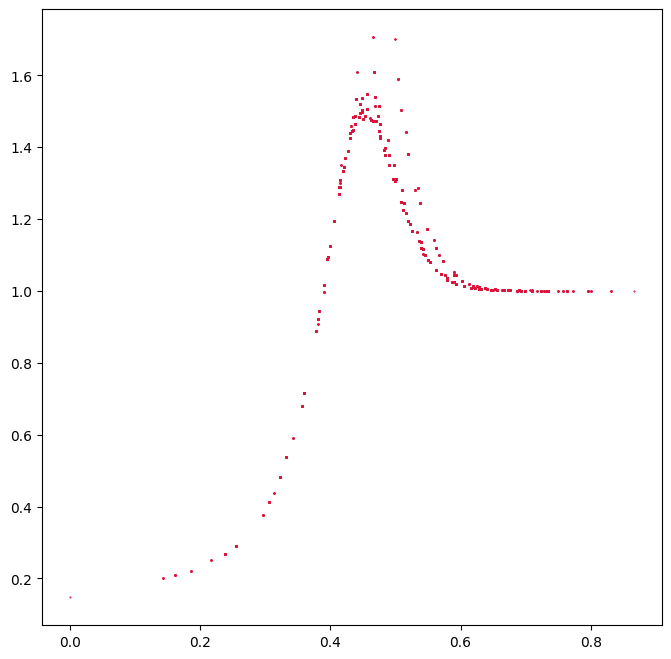

In [17]:
fig = plt.figure(figsize=(8,8))
plt.plot(rad, sdf['rho'], ".", color="crimson", markersize=1)
plt.show()